In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data=pd.read_csv('height-weight.csv')

In [5]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

In [8]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


Text(0.5, 1.0, 'Linear Regression relationship ')

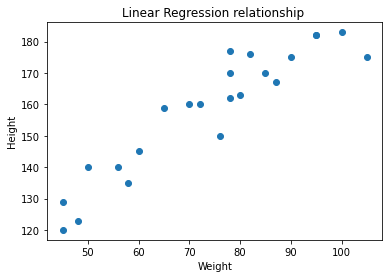

In [11]:
plt.scatter(data.Weight,data.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Linear Regression relationship ")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecbff43cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecbff43eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecbff43460>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecc0bbb490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecc0bbb790>],
 'means': []}

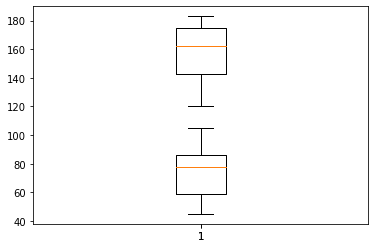

In [13]:
plt.boxplot(data.Weight)
plt.boxplot(data.Height)

<BarContainer object of 23 artists>

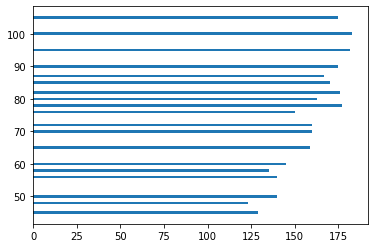

In [16]:
plt.barh(data.Weight,data.Height)

(array([[2., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 2., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]),
 array([ 45.,  51.,  57.,  63.,  69.,  75.,  81.,  87.,  93.,  99., 105.]),
 array([120. , 126.3, 132.6, 138.9, 145.2, 151.5, 157.8, 164.1, 170.4,
        176.7, 183. ]),
 <matplotlib.collections.QuadMesh at 0x1ecc66791c0>)

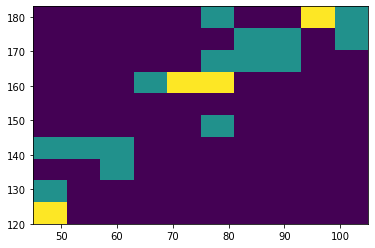

In [20]:
plt.hist2d(data.Weight,data.Height)

In [22]:
data.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [27]:
X=data[['Weight']]

In [28]:
Y=data['Height']

In [29]:
from sklearn.model_selection import train_test_split as t

In [30]:
X_train,X_test,Y_train,Y_test=t(X,Y,random_state=40,shuffle=0.2)

In [31]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor=LinearRegression()

In [34]:
regressor

LinearRegression()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_train

array([[ 1.27536091],
       [-1.45526068],
       [ 0.83846145],
       [-1.45526068],
       [ 0.34694957],
       [ 0.72923659],
       [-1.18219852],
       [ 0.56539929],
       [-0.6360742 ],
       [-1.29142339],
       [-0.85452393],
       [ 1.82148522],
       [-0.74529907],
       [ 0.2377247 ],
       [ 0.34694957],
       [ 1.00229875],
       [ 0.45617443]])

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_test

array([[ 0.01927498],
       [-0.36301205],
       [ 1.27536091],
       [ 0.34694957],
       [-0.08994989],
       [ 1.54842306]])

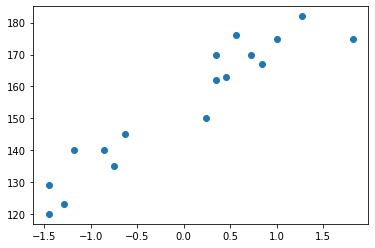

In [41]:
plt.scatter(X_train,Y_train)

In [42]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [43]:
regressor.coef_

array([18.57597457])

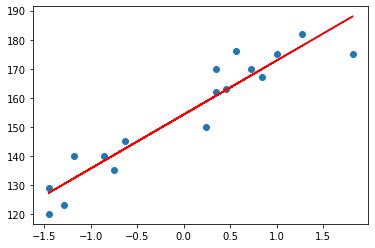

In [44]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [45]:
Y_pred=regressor.predict(X_test)

In [50]:
Y_pred

array([154.59334558, 147.49199158, 177.92636587, 160.68022044,
       152.56438729, 182.99876158])

In [47]:
Y_test

22    160
17    159
11    182
15    177
4     160
13    183
Name: Height, dtype: int64

In [51]:
X_test

array([[ 0.01927498],
       [-0.36301205],
       [ 1.27536091],
       [ 0.34694957],
       [-0.08994989],
       [ 1.54842306]])

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mse=mean_squared_error(Y_test,Y_pred)

In [54]:
mse

83.3140346124661

In [55]:
mae=mean_absolute_error(Y_test,Y_pred)

In [56]:
mae

7.457487942647584

In [57]:
rmse=np.sqrt(mse)

In [58]:
rmse

9.127652196072443